# Import modules

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import xgboost as xgb
from xgboost import XGBRegressor

# Loading dataset

In [2]:
data=pd.read_csv('C:\\Users\\USER\\Desktop\\aducensu\\adult.csv')
data.head(5)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [3]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,32561.0,38.581647,13.640433,17.0,28.0,37.0,48.0,90.0
fnlwgt,32561.0,189778.366512,105549.977697,12285.0,117827.0,178356.0,237051.0,1484705.0
education-num,32561.0,10.080679,2.572720,1.0,9.0,10.0,12.0,16.0
capital-gain,32561.0,1077.648844,7385.292085,0.0,0.0,0.0,0.0,99999.0
capital-loss,32561.0,87.303830,402.960219,0.0,0.0,0.0,0.0,4356.0
hours-per-week,32561.0,40.437456,12.347429,1.0,40.0,40.0,45.0,99.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  country         32561 non-null  object
 14  salary          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [5]:
# Checking the counts of label categories
data.isin(['?']).sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
country           0
salary            0
dtype: int64

# Exploratory analysis

C:\Users\USER\ANACONDA\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


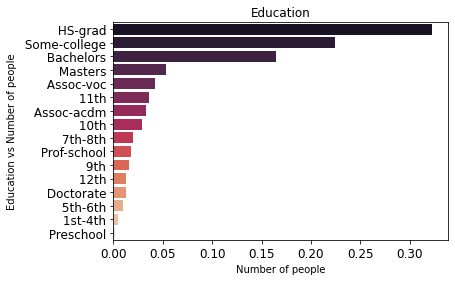

In [11]:
fdt = data["education"].value_counts(normalize=True)

sns.barplot(fdt.values, fdt.index, palette='rocket')
plt.title('Education')
plt.xlabel('Number of people')
plt.ylabel('Education vs Number of people')
plt.tick_params(labelsize=12)
plt.show()

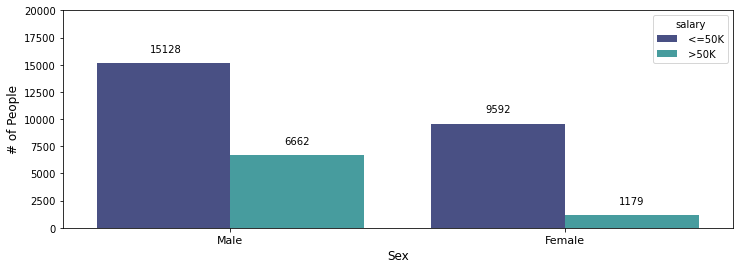

In [12]:
plt.figure(figsize=(12,4))
ax = sns.countplot(data = data, x = 'sex', hue="salary", palette = 'mako')

plt.xlabel("Sex", fontsize= 12)
plt.ylabel("# of People", fontsize= 12)
plt.ylim(0,20000)
plt.xticks([0,1],['Male', 'Female'], fontsize = 11)

for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.16, p.get_height()+1000))

plt.show()

C:\Users\USER\ANACONDA\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


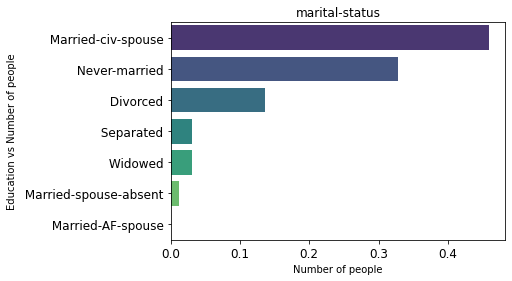

In [14]:
status = data["marital-status"].value_counts(normalize=True)

sns.barplot(status.values, status.index, palette='viridis')
plt.title('marital-status')
plt.xlabel('Number of people')
plt.ylabel('Education vs Number of people')
plt.tick_params(labelsize=12)
plt.show()

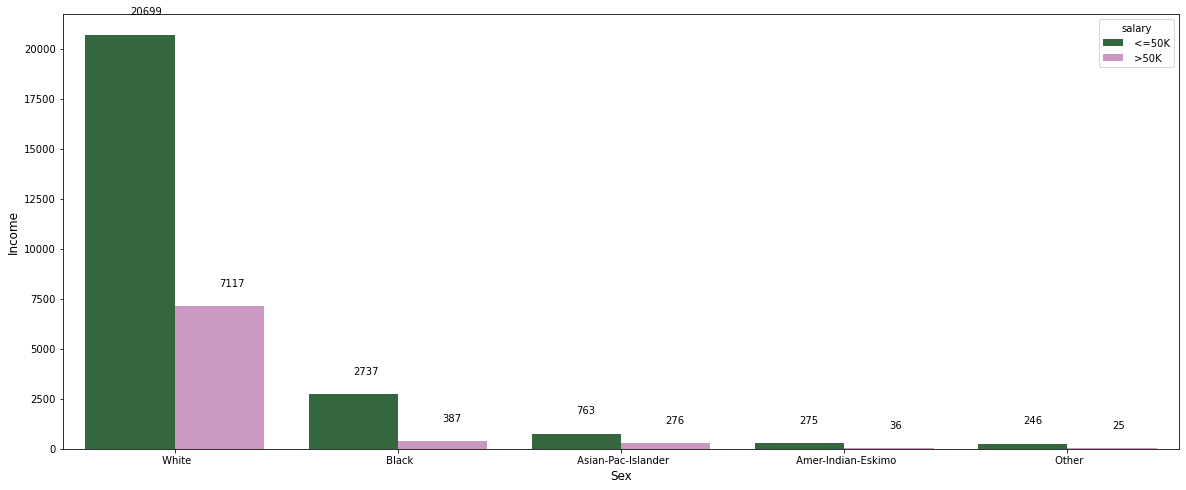

In [15]:
plt.figure(figsize=(20,8))
ax = sns.countplot(data = data, x = 'race', hue="salary", palette = 'cubehelix')

plt.xlabel("Sex", fontsize= 12)
plt.ylabel("Income", fontsize= 12)


for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.20, p.get_height()+1000))

C:\Users\USER\ANACONDA\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


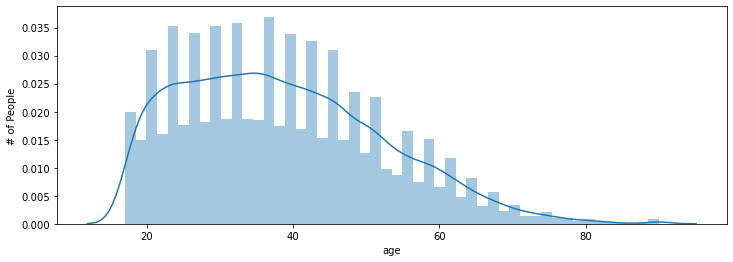

In [16]:
plt.figure(figsize=(12,4))

sns.distplot(data['age'])
plt.ticklabel_format(style='scientific', axis='x') 
plt.ylabel('# of People')
plt.show()

C:\Users\USER\ANACONDA\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


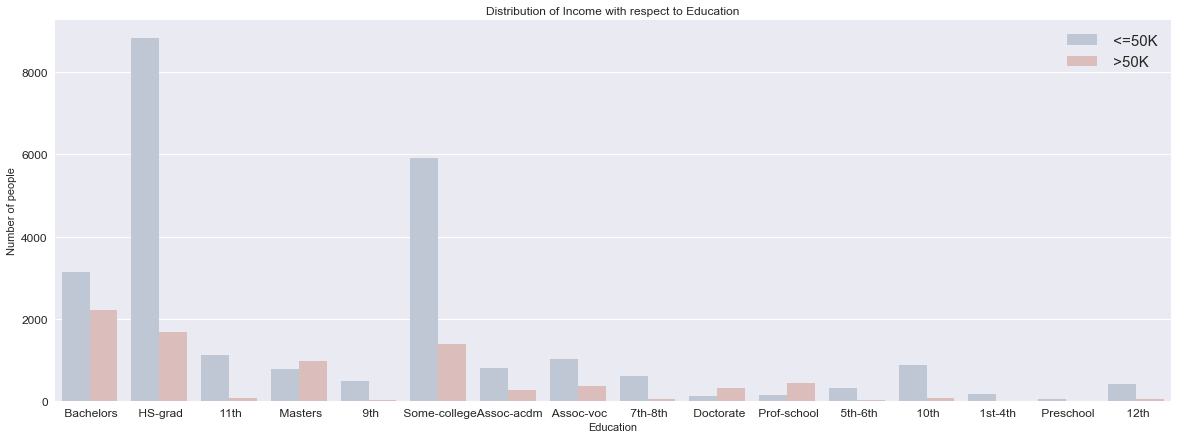

In [18]:
plt.style.use('seaborn')
plt.figure(figsize=(20, 7))
sns.countplot(data['education'],
              hue=data['salary'], palette='vlag')
plt.title('Distribution of Income with respect to Education')
plt.xlabel('Education')
plt.ylabel('Number of people')
plt.tick_params(labelsize=12)
plt.legend(loc=1, prop={'size': 15})
plt.show()

C:\Users\USER\ANACONDA\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


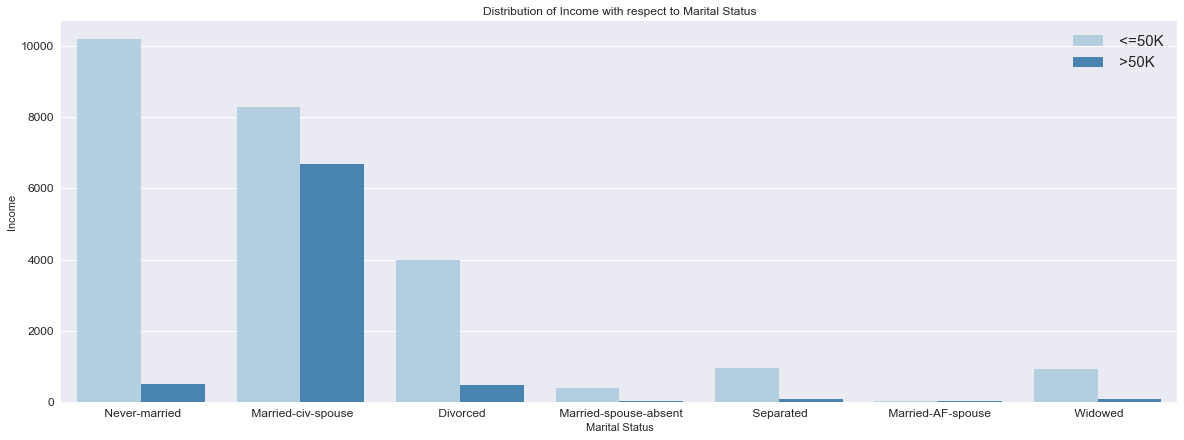

In [21]:
plt.style.use('seaborn')
plt.figure(figsize=(20, 7))
sns.countplot(data['marital-status'],
              hue=data['salary'], palette='Blues')
plt.title('Distribution of Income with respect to Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Income')
plt.tick_params(labelsize=12)
plt.legend(loc=1, prop={'size': 15})
plt.show()

C:\Users\USER\ANACONDA\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


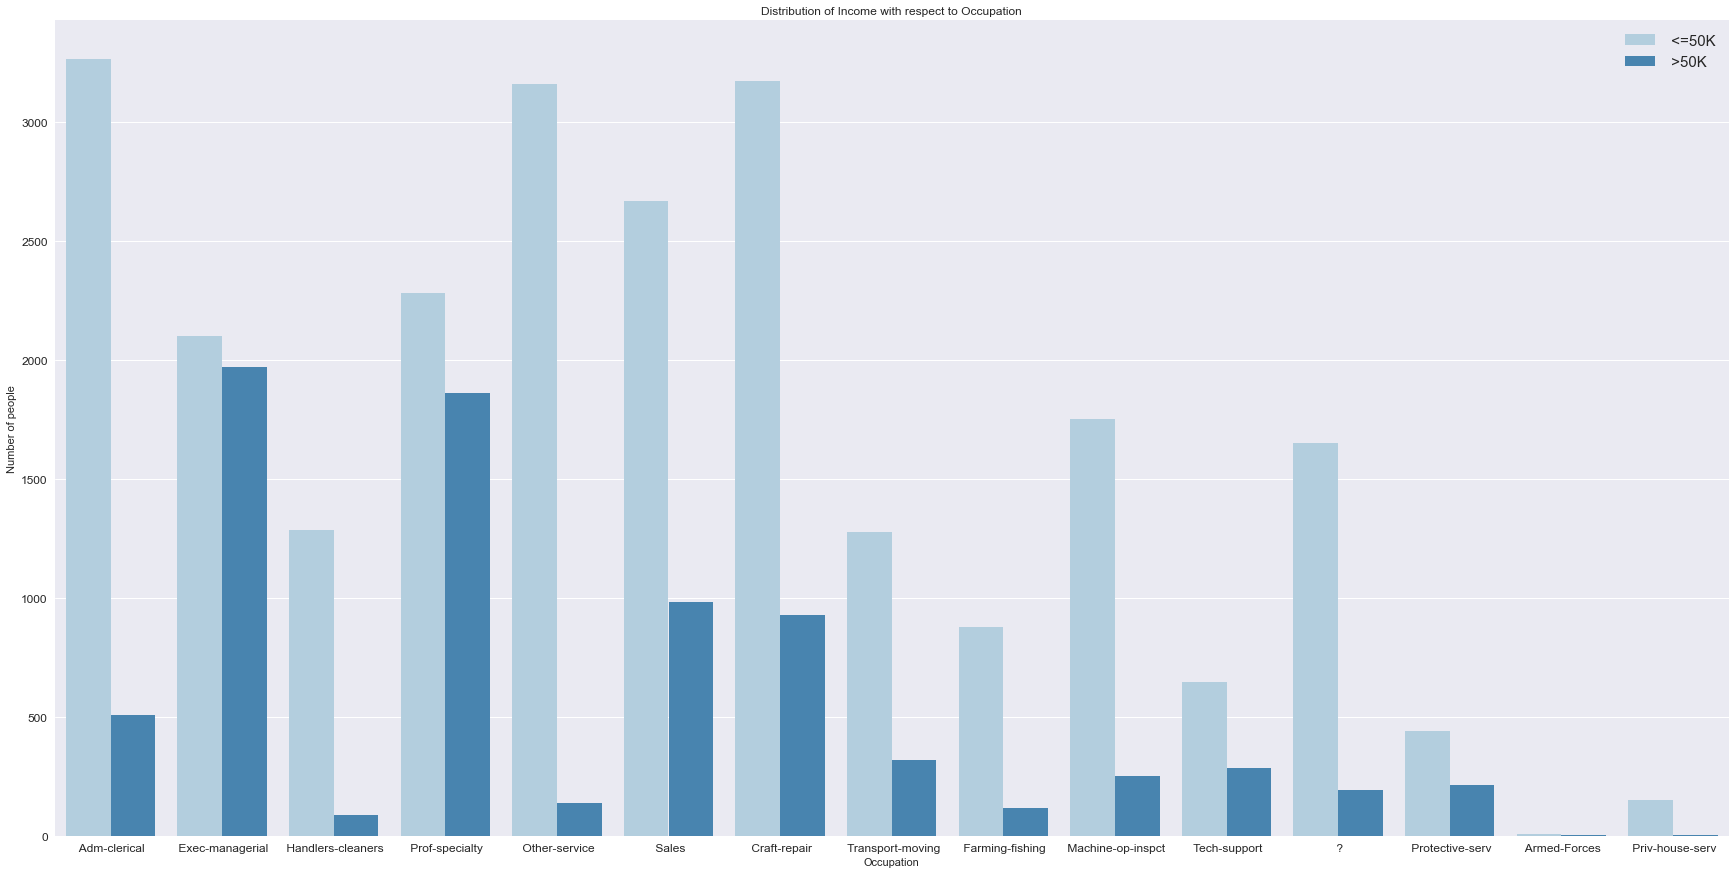

In [22]:
plt.style.use('seaborn')
plt.figure(figsize=(30, 15))
sns.countplot(data['occupation'],
              hue=data['salary'], palette='Blues')
plt.title('Distribution of Income with respect to Occupation')
plt.xlabel('Occupation')
plt.ylabel('Number of people')
plt.tick_params(labelsize=12)
plt.legend(loc=1, prop={'size': 15})
plt.show()

C:\Users\USER\ANACONDA\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


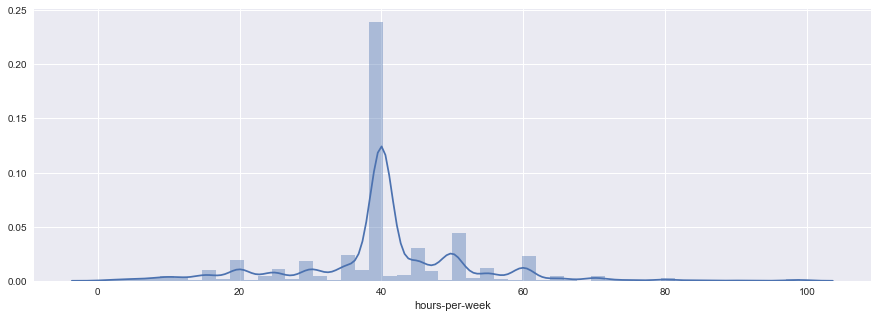

In [25]:
plt.figure(figsize=(15,5))

sns.distplot(data['hours-per-week'])
plt.ticklabel_format(style='plain', axis='x') 
plt.ylabel('')
plt.show()

# Train and Test

In [27]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['salary'] = le.fit_transform(data['salary'])

In [28]:
from sklearn.preprocessing import LabelEncoder
for col in data.columns:
    if data[col].dtypes == 'object':
        le = LabelEncoder()
        
        data[col] = le.fit_transform(data[col].astype(str))

In [29]:
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,39,7,77516,9,13,4,1,1,4,1,2174,0,40,39,0
1,50,6,83311,9,13,2,4,0,4,1,0,0,13,39,0
2,38,4,215646,11,9,0,6,1,4,1,0,0,40,39,0
3,53,4,234721,1,7,2,6,0,2,1,0,0,40,39,0
4,28,4,338409,9,13,2,10,5,2,0,0,0,40,5,0


In [31]:
X = data.drop(["fnlwgt","education","marital-status","relationship","race"],axis=1)
X

,age,workclass,education-num,occupation,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,39,7,13,1,1,2174,0,40,39,0
1,50,6,13,4,1,0,0,13,39,0
2,38,4,9,6,1,0,0,40,39,0
3,53,4,7,6,1,0,0,40,39,0
4,28,4,13,10,0,0,0,40,5,0
...,...,...,...,...,...,...,...,...,...,...
32556,27,4,12,13,0,0,0,38,39,0
32557,40,4,9,7,1,0,0,40,39,1
32558,58,4,9,1,0,0,0,40,39,0
32559,22,4,9,1,1,0,0,20,39,0


In [33]:
X = data.drop("salary",axis=1)
y = data.salary

In [34]:
y

0        0
1        0
2        0
3        0
4        0
        ..
32556    0
32557    1
32558    0
32559    0
32560    1
Name: salary, Length: 32561, dtype: int32

In [35]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
y.value_counts(normalize=True)

0    0.75919
1    0.24081
Name: salary, dtype: float64

In [36]:
# balancing the skewed data
from imblearn.over_sampling import RandomOverSampler 
rs = RandomOverSampler(random_state=30)

In [37]:
rs.fit(X,y)

RandomOverSampler(random_state=30)

In [38]:
X_new,y_new = rs.fit_resample(X, y)
y_new.value_counts(normalize=True)

0    0.5
1    0.5
Name: salary, dtype: float64

In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y_new, test_size=0.3, random_state=30)
X_train.dtypes

age               int64
workclass         int32
fnlwgt            int64
education         int32
education-num     int64
marital-status    int32
occupation        int32
relationship      int32
race              int32
sex               int32
capital-gain      int64
capital-loss      int64
hours-per-week    int64
country           int32
dtype: object

In [41]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (34608, 14)
X_test shape: (14832, 14)
y_train shape: (34608,)
y_test shape: (14832,)


In [43]:
#LogisticRegression
lr = LogisticRegression(solver = "liblinear")
lr.fit(X_train,y_train)
y_pred_lr = lr.predict(X_test)
y_pred_lr

array([1, 0, 0, ..., 0, 0, 0])

In [44]:
#GaussianNB
gn = GaussianNB()
gn.fit(X_train,y_train)
y_pred_gn = gn.predict(X_test)
y_pred_gn

array([0, 0, 0, ..., 0, 0, 0])

In [47]:
#RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred_rf = rf.predict(X_test)

In [48]:
#DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)
y_pred_dt = dt.predict(X_test)

In [49]:
#SVC
svc = SVC()
svc.fit(X_train,y_train)
y_pred_svc = svc.predict(X_test)

In [50]:
#XGB
xgb = XGBClassifier()
xgb.fit(X_train,y_train)
y_pred_xgb = xgb.predict(X_test)

In [53]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import mean_absolute_error

In [54]:
print("Logistic Regression:")
print("Accuracy score:", round(accuracy_score(y_test, y_pred_lr) * 100, 3))
print("F1 Score: ", round(f1_score(y_test,y_pred_lr) * 100,3))
print("MSE: ", round(mean_squared_error(y_test,y_pred_lr) * 100,3))

Logistic Regression:
Accuracy score: 74.231
F1 Score:  74.346
MSE:  25.769


In [55]:
print("GaussianNB/ Naive Byers:")
print('Accuracy score:', round(accuracy_score(y_test, y_pred_gn) * 100, 3))
print("F1 Score: ", round(f1_score(y_test,y_pred_gn) * 100,3))
print("MSE: ", round(mean_squared_error(y_test,y_pred_gn) * 100,3))

GaussianNB/ Naive Byers:
Accuracy score: 63.39
F1 Score:  46.152
MSE:  36.61


In [56]:
print("RandomForestClassifier:")
print('Accuracy score:', round(accuracy_score(y_test, y_pred_rf) * 100, 3))
print("F1 Score: ", round(f1_score(y_test,y_pred_rf) * 100,3))
print("MSE: ", round(mean_squared_error(y_test,y_pred_rf) * 100,3))

RandomForestClassifier:
Accuracy score: 92.584
F1 Score:  92.843
MSE:  7.416


In [57]:
print("DecisionTreeClassifier:")
print('Accuracy score:', round(accuracy_score(y_test, y_pred_dt) * 100, 3))
print("F1 Score: ", round(f1_score(y_test,y_pred_dt) * 100,3))
print("MSE: ", round(mean_squared_error(y_test,y_pred_dt) * 100,3))

DecisionTreeClassifier:
Accuracy score: 90.574
F1 Score:  90.986
MSE:  9.426


In [58]:
print("Support Vector Machine:")
print('Accuracy score:', round(accuracy_score(y_test, y_pred_svc) * 100, 3))
print("F1 Score: ", round(f1_score(y_test,y_pred_svc) * 100,3))
print("MSE: ", round(mean_squared_error(y_test,y_pred_svc) * 100,3))

Support Vector Machine:
Accuracy score: 59.527
F1 Score:  33.084
MSE:  40.473


In [59]:
print("XGBoost Classifier:")
print('Accuracy score:', round(accuracy_score(y_test, y_pred_xgb) * 100, 3))
print("F1 Score: ", round(f1_score(y_test,y_pred_xgb) * 100,3))
print("MSE: ", round(mean_squared_error(y_test,y_pred_xgb) * 100,3))

XGBoost Classifier:
Accuracy score: 87.318
F1 Score:  87.663
MSE:  12.682


In [66]:

from sklearn.model_selection import GridSearchCV

params = {
    'max_depth': [2, 3, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100,150],
    'criterion': ["gini", "entropy"]
}

grid_search = GridSearchCV(estimator=dt, param_grid=params,cv=5, n_jobs=1, verbose=1, scoring = "accuracy")
grid_search.fit(X_train, y_train)


Fitting 5 folds for each of 60 candidates, totalling 300 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 150]},
             scoring='accuracy', verbose=1)

In [67]:
score_data = pd.DataFrame(grid_search.cv_results_)
score_data.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.088627,0.034283,0.021197,0.007618,gini,2,5,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.767842,0.760618,0.757151,0.741511,0.758272,0.757079,0.008627,49
1,0.064569,0.011634,0.006250,0.007655,gini,2,10,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.767842,0.760618,0.757151,0.741511,0.758272,0.757079,0.008627,49
2,0.070340,0.023600,0.002393,0.002931,gini,2,20,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.767842,0.760618,0.757151,0.741511,0.758272,0.757079,0.008627,49
3,0.048688,0.003670,0.004322,0.006108,gini,2,50,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.767842,0.760618,0.757151,0.741511,0.758272,0.757079,0.008627,49
4,0.047644,0.009481,0.003126,0.006252,gini,2,100,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.767842,0.760618,0.757151,0.741511,0.758272,0.757079,0.008627,49


In [68]:
grid_search.best_params_

{'criterion': 'entropy', 'max_depth': 20, 'min_samples_leaf': 5}

In [69]:
grid_search.best_score_

0.8454114522584326

In [72]:
dt_tuned = RandomForestClassifier(max_depth=95,criterion='gini', n_estimators=142, random_state=30)
dt_tuned.fit(X_train,y_train)

RandomForestClassifier(max_depth=95, n_estimators=142, random_state=30)

In [73]:
y_pred_dt_tuned = dt_tuned.predict(X_test)
print("RandomForestClassifier:")
print('Accuracy score:', round(accuracy_score(y_test, y_pred_dt_tuned) * 100, 3))
print("F1 Score: ", round(f1_score(y_test,y_pred_dt_tuned) * 100,3))
print("MSE: ", round(mean_squared_error(y_test,y_pred_dt_tuned) * 100,3))

RandomForestClassifier:
Accuracy score: 92.779
F1 Score:  93.031
MSE:  7.221


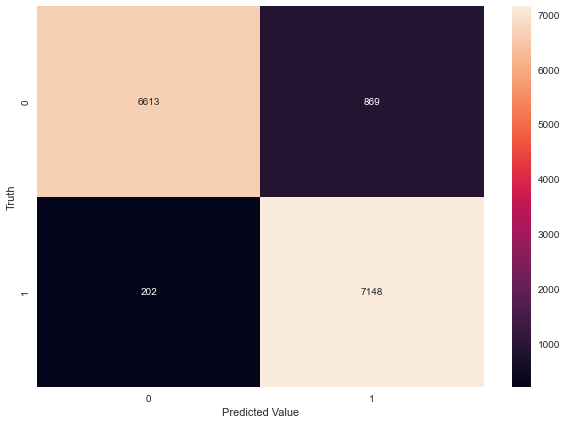

In [74]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_dt_tuned)
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True,fmt="d")
plt.xlabel("Predicted Value")
plt.ylabel("Truth")
plt.show()

In [75]:
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(start=40, stop=150, num=15)]
max_depth = [int(x) for x in np.linspace(40, 150, num=15)]

parameters = {
    'n_estimators': n_estimators,
    'max_depth': max_depth,
}

rf_tuned = RandomForestClassifier(random_state=30)
                       
rf_cv = RandomizedSearchCV(estimator=rf_tuned, param_distributions=parameters, cv=5, random_state=30)

In [77]:
rf_cv.fit(X_train,y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=30),
                   param_distributions={'max_depth': [40, 47, 55, 63, 71, 79,
                                                      87, 95, 102, 110, 118,
                                                      126, 134, 142, 150],
                                        'n_estimators': [40, 47, 55, 63, 71, 79,
                                                         87, 95, 102, 110, 118,
                                                         126, 134, 142, 150]},
                   random_state=30)

In [78]:
rf_cv.best_params_

{'n_estimators': 40, 'max_depth': 134}

In [79]:
rf_cv.best_score_

0.9102518658901146